# 1. Delivery_time -> Predict delivery time using sorting time 


In [1]:
import pandas as pd
data = pd.read_csv("D:/Excelr Solutions/Documents/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Correlation

In [3]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

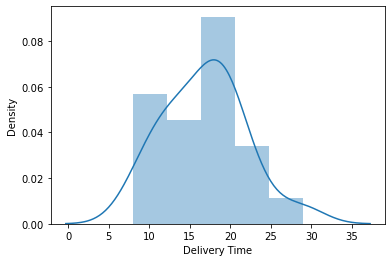

In [4]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

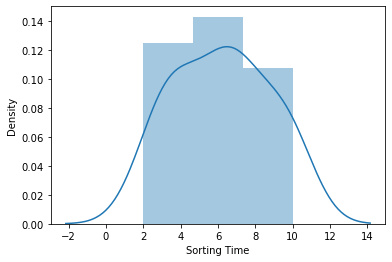

In [5]:
import seaborn as sns
sns.distplot(data['Sorting Time'])

Fitting a Linear Regression Model

In [8]:
data=data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("Sorting_Time~Delivery_Time",data = data).fit()

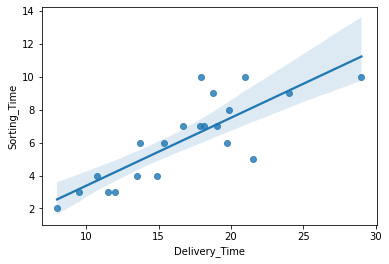

In [10]:
sns.regplot(x="Delivery_Time", y="Sorting_Time", data=data);

In [11]:
model.params

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [12]:
print(model.tvalues, '\n', model.pvalues)    

Intercept       -0.667290
Delivery_Time    6.387447
dtype: float64 
 Intercept        0.512611
Delivery_Time    0.000004
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417232, 0.6655489208860245)

# Predict for new data point

In [14]:
newdata=pd.Series([7,9])

In [15]:
data_pred=pd.DataFrame(newdata,columns=['Delivery_Time'])

In [16]:
model.predict(data_pred)

0    2.139532
1    2.967019
dtype: float64